In [1]:
%pylab inline
import seaborn as sns
sns.set_context('poster')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO: 2016-05-12 14:49:39,213 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [26]:
import glob
import joblib

In [4]:
files = glob.glob('/artemis/readout/2016-04-2[89]*.nc')
files.sort()

In [5]:
nc = NCFile(files[3])

In [6]:
meas = nc.SweepArray0

In [7]:
s0 = meas.sweep(0)

In [8]:
res = s0.resonator

In [19]:
def process_one(fn):
    ncf = NCFile(fn)
    try:
        meas = ncf.SweepArray0
    except AttributeError:
        return None
    temperature.add_temperature(meas,'starcryo',recursive=True)
    rows = meas.to_dataframe()
    ncf.close()
    return rows

In [27]:
parp = joblib.Parallel(n_jobs=20,verbose=10)
memory = joblib.Memory(cachedir='/home/gjones/pipeline_cache',mmap_mode='c',verbose=5)
all_rows = parp(joblib.delayed(memory.cache(process_one))(fn) for fn in files)


________________________________________________________________________________
[Memory] Calling __main__--data-home-gjones-notebooks-2016-__ipython-input__.process_one...
process_one('/artemis/readout/2016-04-28_202715_dark_28_dB_dac.nc')
________________________________________________________________________________
[Memory] Calling __main__--data-home-gjones-notebooks-2016-__ipython-input__.process_one...
process_one('/artemis/readout/2016-04-29_105656_dark_40_dB_dac.nc')
______________________________________________________process_one - 4.5s, 0.1min
[Memory]    4.6s, 0.1min: Loading process_one...
________________________________________________________________________________
[Memory] Calling __main__--data-home-gjones-notebooks-2016-__ipython-input__.process_one...
process_one('/artemis/readout/2016-04-29_110257_dark_36_dB_dac.nc')


[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    4.7s


______________________________________________________process_one - 4.5s, 0.1min
[Memory]    4.5s, 0.1min: Loading process_one...
________________________________________________________________________________
[Memory] Calling __main__--data-home-gjones-notebooks-2016-__ipython-input__.process_one...
process_one('/artemis/readout/2016-04-29_110857_dark_32_dB_dac.nc')
_____________________________________________________process_one - 10.2s, 0.2min
[Memory]   10.3s, 0.2min: Loading process_one...
________________________________________________________________________________
[Memory] Calling __main__--data-home-gjones-notebooks-2016-__ipython-input__.process_one...
process_one('/artemis/readout/2016-04-29_111459_dark_28_dB_dac.nc')
______________________________________________________process_one - 3.7s, 0.1min
[Memory]    3.7s, 0.1min: Loading process_one...
________________________________________________________________________________
[Memory] Calling __main__--data-home-gjones-not

[Parallel(n_jobs=20)]: Done  40 out of  40 | elapsed:   55.3s finished


In [29]:
import pandas as pd

In [30]:
%time df = pd.concat(all_rows,ignore_index=True)

CPU times: user 204 ms, sys: 0 ns, total: 204 ms
Wall time: 204 ms


In [73]:
from kid_readout.analysis.archive import save_archive

In [74]:
save_archive(df,'/artemis/readout/archive/2016-05-12-stanford-Nb-LEKID-temperature-sweep')

In [75]:
!ls /artemis/readout/archive/2016-05-12-stanford-Nb-LEKID-temperature-sweep.npy

/artemis/readout/archive/2016-05-12-stanford-Nb-LEKID-temperature-sweep.npy


In [31]:
df.shape

(304, 54)

In [35]:
df.number.value_counts()

7    38
6    38
5    38
4    38
3    38
2    38
1    38
0    38
Name: number, dtype: int64

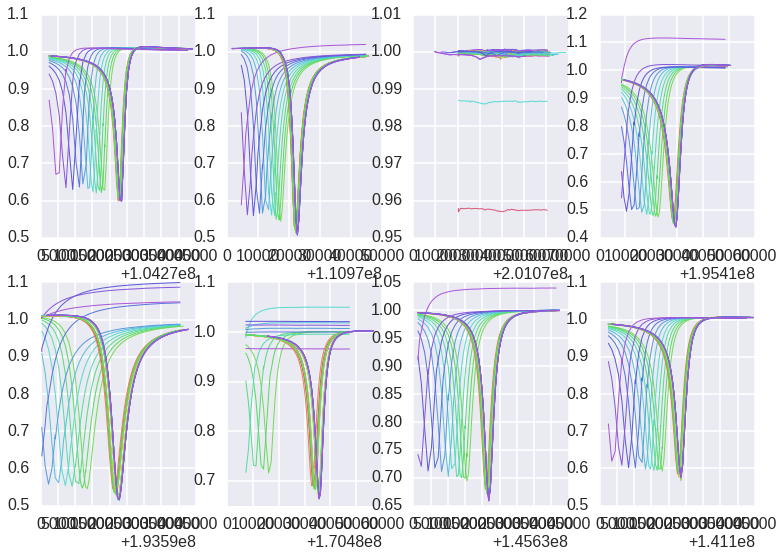

In [76]:
sns.set_palette(sns.palettes.hls_palette(21))
fig,axs = subplots(2,4)
for k,row in df.iterrows():
    ax = axs.flatten()[row.number]
    ax.plot(row.res_frequency_data,np.abs(row.res_s21_data/row.res_A_mag),lw=1)
#    ax.plot(row.res_model_frequency,np.abs(row.res_model_s21))
    

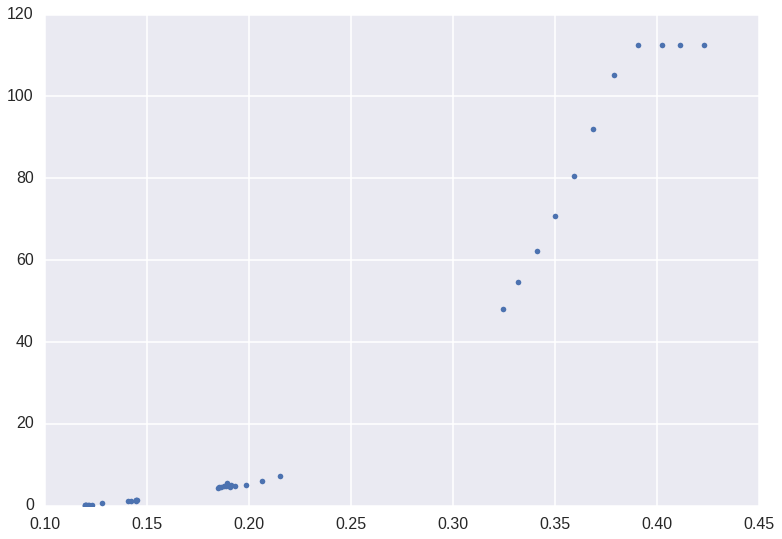

In [52]:
dd = df[df.number==4]
plot(dd.temperature_primary_package,1e6*(1-dd.res_f_0/dd.res_f_0.max()),'.')

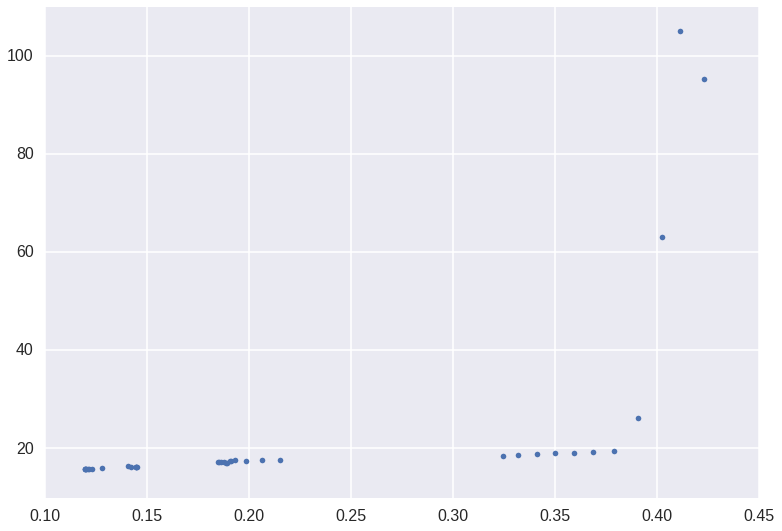

In [53]:
plot(dd.temperature_primary_package,1e6/dd.res_Q_i,'.')


In [10]:
row.index

Index([u'analysis_epoch', u'number', u'res_A_mag', u'res_A_mag_error',
       u'res_A_slope', u'res_A_slope_error', u'res_Q', u'res_Q_e',
       u'res_Q_e_imag', u'res_Q_e_imag_error', u'res_Q_e_real',
       u'res_Q_e_real_error', u'res_Q_error', u'res_Q_i', u'res_delay',
       u'res_delay_error', u'res_f_0', u'res_f_0_error', u'res_f_min',
       u'res_f_min_error', u'res_frequency_data', u'res_model_frequency',
       u'res_model_s21', u'res_phi', u'res_phi_error', u'res_redchi',
       u'res_s21_data', u'res_s21_errors', u'roach_adc_sample_rate',
       u'roach_bank', u'roach_boffile', u'roach_dac_attenuation',
       u'roach_debug_register', u'roach_heterodyne', u'roach_lo_frequency',
       u'roach_loopback', u'roach_modulation_output', u'roach_modulation_rate',
       u'roach_num_filterbank_channels', u'roach_num_tone_samples',
       u'roach_num_tones', u'roach_waveform_normalization', u'start_epoch',
       u'temperature_primary_load', u'temperature_primary_package',
       u

In [11]:
files[2]

'/artemis/readout/2016-04-28_143301_dark_40_dB_dac.nc'